# Number of ballast unfixed vessels in Mediterranean and Black Sea

In this example, an analysis over the ballast unfixed aframax vessels that currently are in Mediterranean and Black Sea will be provided.

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [5]:
signal_ocean_api_key = 'Not Valid' #replace with your subscription key

In [6]:
from datetime import date, timedelta,time
from signal_ocean import PortAPI, VesselClassAPI,PortFilter,VesselClassFilter,Connection
from signal_ocean.historical_tonnage_list import VesselFilter, PushType, MarketDeployment, CommercialStatus, VesselSubclass, OperationalStatus
from signal_ocean.historical_tonnage_list import HistoricalTonnageListAPI
from signal_ocean.historical_tonnage_list import IndexLevel

connection = Connection(signal_ocean_api_key)

port_api = PortAPI(connection)
vessel_class_api = VesselClassAPI(connection)
htl_api = HistoricalTonnageListAPI(connection)
vessel_class = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='aframax'))[0]
port = port_api.get_ports(PortFilter(name_like='ceyhan'))[0]
laycanEndInDays = 20
start_date = date.today() - timedelta(days=5)
end_date = date.today()

vessel_filter = VesselFilter(
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    vessel_subclass=VesselSubclass.DIRTY,
    latest_ais_since=5
)


htl_for_supply_trend = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    laycanEndInDays,
    start_date,
    end_date,
    vessel_filter=vessel_filter,
    time=time(hour=6)
)

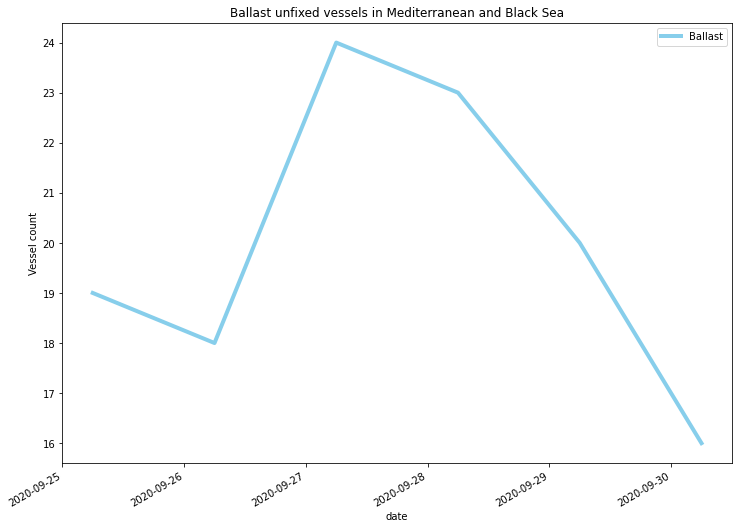

In [7]:
supply_trend_data_frame = htl_for_supply_trend.to_data_frame()
open_areas_of_interest = ['East Mediterranean', 'Central Mediterranean','West Mediterranean', 'Black Sea']

operationalStatuses = [OperationalStatus.BALLAST_UNFIXED]
areas_filter = supply_trend_data_frame.open_narrow_area_point_in_time.isin(open_areas_of_interest)
operational_status_filter = supply_trend_data_frame.operational_status_point_in_time.isin(operationalStatuses)

aggregatedData = supply_trend_data_frame[operational_status_filter & areas_filter].groupby(IndexLevel.DATE, sort=True).size()


ax = aggregatedData.plot(markerfacecolor='blue', color='skyblue', linewidth=4, label='Ballast', figsize=(12, 9), title='Ballast unfixed vessels in Mediterranean and Black Sea')
ax.set_ylabel('Vessel count')
ax.legend()